In [11]:
import pandas as pd
df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")

C:\Users\shyam\AppData\Local\Temp\ipykernel_36136\3483609155.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Crash_Reporting_-_Drivers_Data.csv")


In [12]:
# Removing unknown records from Driver at Fault
df = df[df["Driver At Fault"]!="Unknown"]

In [13]:
#converting everything into lower case 
df=df.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)

C:\Users\shyam\AppData\Local\Temp\ipykernel_36136\4120849912.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df=df.applymap(lambda x: str(x).lower() if isinstance(x,str) else x)


In [14]:
# converting to datetime object from string
import datetime
df["Crash Date/Time"] = df["Crash Date/Time"].apply(lambda x: datetime.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p"))

In [15]:
df = df.sort_values(by='Crash Date/Time')

In [16]:
# remove null values from this column 156 na found
df = df[df["Vehicle First Impact Location"].notna()]

# combining categories
df["Vehicle First Impact Location"] = df["Vehicle First Impact Location"].str.replace("roof top", "top", regex=True)
df["Vehicle First Impact Location"] = df["Vehicle First Impact Location"].str.replace(" ", "", regex=True)

df["Vehicle Movement"] = df["Vehicle Movement"].str.replace("making u-turn", "making u turn", regex=True)
df["Vehicle Movement"] = df["Vehicle Movement"].str.replace("parking", "parked", regex=True)

df["Driver Distracted By"] = df["Driver Distracted By"].str.replace("other distraction", "other action (looking away from task, etc.)", regex=True)
df["Driver Distracted By"] = df["Driver Distracted By"].str.replace("other cellular phone related", "talking or listening to cellular phone", regex=True)
df["Driver Distracted By"] = df["Driver Distracted By"].str.replace("adjusting audio and or climate controls", "using other device controls integral to vehicle", regex=True)

df["Route Type"] = df["Route Type"].str.replace('-', 'unknown', regex=True)
df["Off-Road Description"] = df["Off-Road Description"].str.replace('-', 'unknown', regex=True)

df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, not suspect of drug use", "none detected", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("unknown, unknown", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, suspect of drug use", "suspect of drug use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, unknown", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("suspect of alcohol use, not suspect of drug use", "suspect of alcohol use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("alcohol contributed", "alcohol present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("illegal drug contributed", "illegal drug present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("combination contributed", "combined substance present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("suspect of alcohol use, unknown", "suspect of alcohol use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("suspect of alcohol use, suspect of drug use", "combined substance present", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("not suspect of alcohol use, unknown", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("unknown, suspect of drug use", "suspect of drug use", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("other", "unknown", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("unknown, not suspect of drug use", "none detected", regex=True)
df["Driver Substance Abuse"] = df["Driver Substance Abuse"].str.replace("medication contributed", "medication present", regex=True)


In [17]:
# drop irrelavat or redundant columns

df.drop(columns=['Circumstance', 'Driverless Vehicle', 'Vehicle Year', 'Vehicle Make', 'Vehicle Model','Location','Related Non-Motorist', 'Non-Motorist Substance Abuse','Report Number', 'Local Case Number'], inplace=True)
df.drop(columns=['Agency Name', 'ACRS Report Type', 'Crash Date/Time', 'Route Type',
       'Road Name', 'Cross-Street Name', 'Off-Road Description',
       'Municipality','Weather', 'Surface Condition',
       'Light', 'Traffic Control','Person ID','Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent','Vehicle Body Type','Vehicle Going Dir', 'Speed Limit',
       'Parked Vehicle', 'Latitude', 'Longitude'], inplace=True)

In [18]:
df["Vehicle Movement"].isna().sum()

1389

In [19]:
df.dropna(subset=["Vehicle Movement"],inplace=True)

In [20]:
list(df["Vehicle Movement"].unique())

['stopped in traffic lane',
 'slowing or stopping',
 'making left turn',
 'moving constant speed',
 'starting from parked',
 'parked',
 'making right turn',
 'accelerating',
 'unknown',
 'starting from lane',
 'backing',
 'changing lanes',
 'entering traffic lane',
 'skidding',
 'other',
 'making u turn',
 'negotiating a curve',
 'passing',
 'leaving traffic lane',
 'right turn on red',
 'driverless moving veh.',
 'overtaking/passing',
 'turning left',
 'stopped in traffic']

In [21]:
df['Driver Substance Abuse'].isna().sum()
df['Driver Substance Abuse'].fillna("unknown", inplace=True)

C:\Users\shyam\AppData\Local\Temp\ipykernel_36136\2483482584.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver Substance Abuse'].fillna("unknown", inplace=True)


In [22]:
df['Driver Substance Abuse'].isna().sum()

0

In [23]:
df.to_csv("EDA_3.csv", index = False)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc
# Load the dataset
file_path = 'EDA_3.csv'
df = pd.read_csv(file_path)

In [25]:
# Label Encoding
encoder = LabelEncoder()

df_encode = df.copy()

for col in df_encode.columns:
	if df_encode[col].dtype in ['O', 'object', 'category']:
		df_encode[col]= encoder.fit_transform(df_encode[col])

In [26]:
y=df['Driver At Fault']
y = encoder.fit_transform(y)


In [27]:
df_encode.drop(labels=['Driver At Fault'], axis=1, inplace=True)

In [28]:
# Scaling
Scaler = StandardScaler()
scaled_x = Scaler.fit_transform(df_encode)


In [29]:
# Train test Split
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.4, random_state=42, stratify=y)

Random Forest Accuracy: 88.31%

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.88      0.88     19311
           1       0.88      0.88      0.88     19215

    accuracy                           0.88     38526
   macro avg       0.88      0.88      0.88     38526
weighted avg       0.88      0.88      0.88     38526

XGBoost Accuracy: 88.56%

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     19311
           1       0.89      0.89      0.89     19215

    accuracy                           0.89     38526
   macro avg       0.89      0.89      0.89     38526
weighted avg       0.89      0.89      0.89     38526


Hypothesis Testing:
T-statistic: -3.02
P-value: 0.0025
Reject the null hypothesis: The accuracies of Random Forest and XGBoost are significantly different.


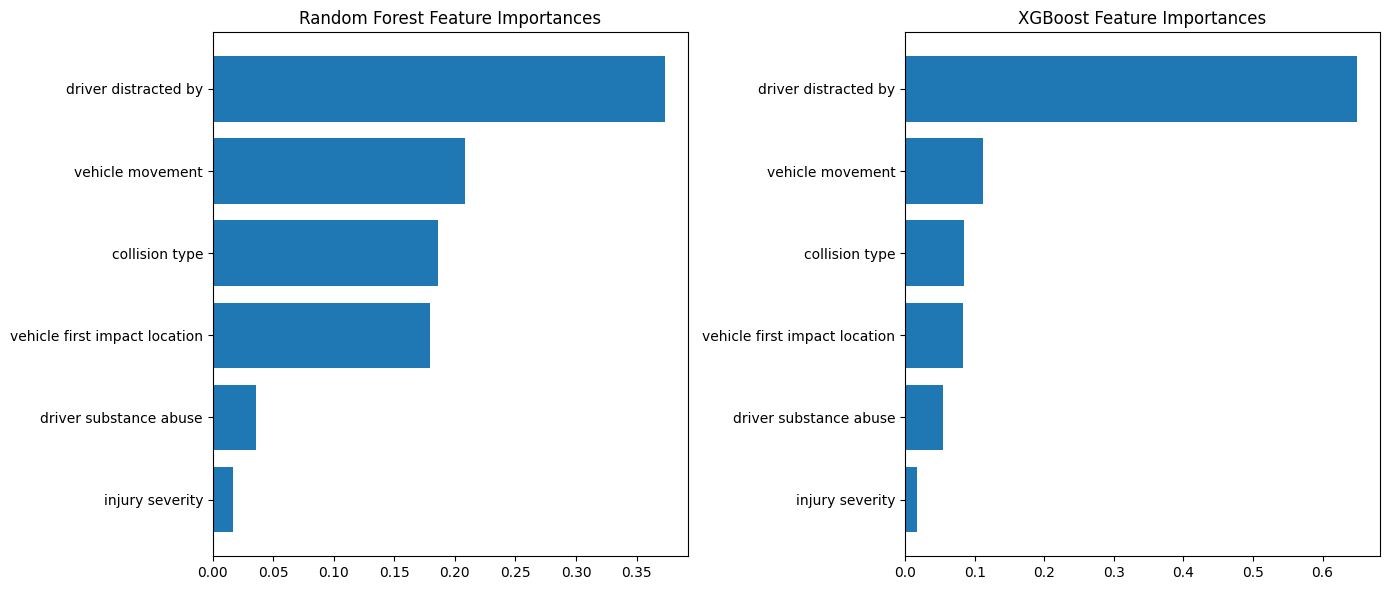

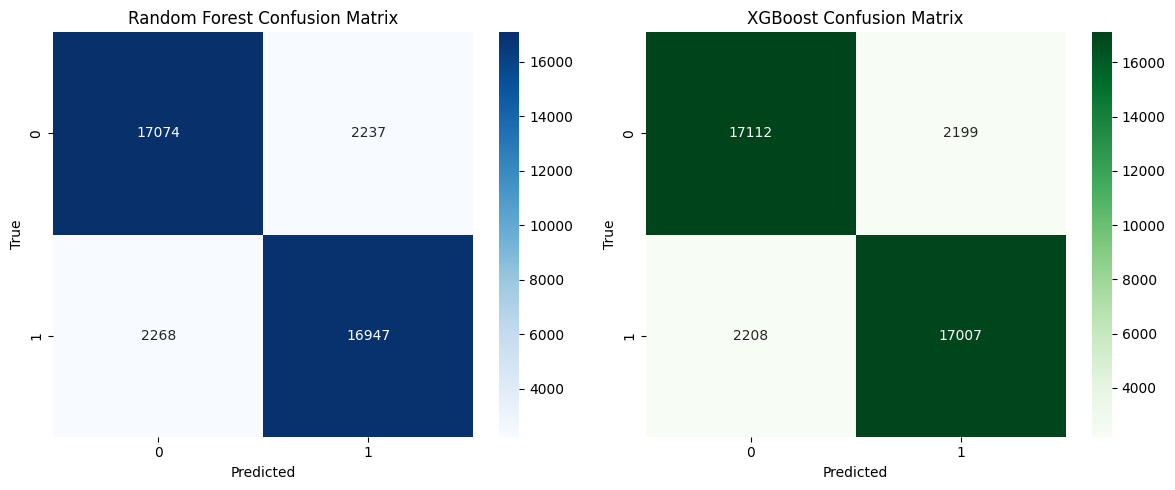

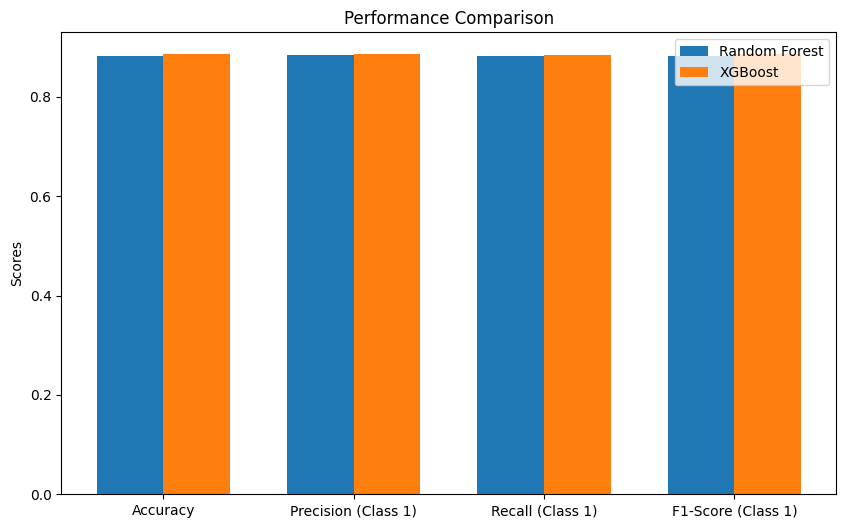

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the cleaned dataset
data = pd.read_csv('EDA_3.csv')

# Standardize column names
data.columns = data.columns.str.strip().str.lower()

# Identify features (X) and target (y)
target_column = 'driver at fault'
X = data.drop(columns=[target_column], errors='ignore')
y = data[target_column]

# Handle categorical variables by encoding them
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column].astype(str))
    label_encoders[column] = le

# Encode target variable
y = LabelEncoder().fit_transform(y.astype(str))

# Address class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_predictions))

# Initialize XGBoost Classifier
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

# Evaluate XGBoost
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print(f"XGBoost Accuracy: {xgb_accuracy * 100:.2f}%")
print("\nXGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))

# Hypothesis Testing: Comparing Accuracies
rf_correct = (rf_predictions == y_test)
xgb_correct = (xgb_predictions == y_test)

# Convert boolean arrays to integers for t-test
rf_correct_int = rf_correct.astype(int)
xgb_correct_int = xgb_correct.astype(int)

# Perform paired t-test
t_stat, p_value = ttest_rel(rf_correct_int, xgb_correct_int)

print(f"\nHypothesis Testing:\nT-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: The accuracies of Random Forest and XGBoost are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the accuracies of Random Forest and XGBoost.")

# Visualizations

# 1. Feature Importances
rf_importances = rf_model.feature_importances_
xgb_importances = xgb_model.feature_importances_
features = X_train.columns

indices_rf = np.argsort(rf_importances)[-10:]  # Top 10 features
indices_xgb = np.argsort(xgb_importances)[-10:]  # Top 10 features

plt.figure(figsize=(14, 6))

# Random Forest Feature Importance
plt.subplot(1, 2, 1)
plt.barh(range(len(indices_rf)), rf_importances[indices_rf], align='center')
plt.yticks(range(len(indices_rf)), [features[i] for i in indices_rf])
plt.title("Random Forest Feature Importances")

# XGBoost Feature Importance
plt.subplot(1, 2, 2)
plt.barh(range(len(indices_xgb)), xgb_importances[indices_xgb], align='center')
plt.yticks(range(len(indices_xgb)), [features[i] for i in indices_xgb])
plt.title("XGBoost Feature Importances")

plt.tight_layout()
plt.show()

# 2. Confusion Matrix Heatmap
rf_cm = confusion_matrix(y_test, rf_predictions)
xgb_cm = confusion_matrix(y_test, xgb_predictions)

plt.figure(figsize=(12, 5))

# Random Forest Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

# XGBoost Confusion Matrix
plt.subplot(1, 2, 2)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens')
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")

plt.tight_layout()
plt.show()

# 3. Performance Comparison
metrics = ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-Score (Class 1)']
rf_report = classification_report(y_test, rf_predictions, output_dict=True)
xgb_report = classification_report(y_test, xgb_predictions, output_dict=True)

rf_values = [rf_accuracy, rf_report['1']['precision'], rf_report['1']['recall'], rf_report['1']['f1-score']]
xgb_values = [xgb_accuracy, xgb_report['1']['precision'], xgb_report['1']['recall'], xgb_report['1']['f1-score']]

x = np.arange(len(metrics))  # Label locations
width = 0.35  # Bar width

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rf_values, width, label='Random Forest')
plt.bar(x + width/2, xgb_values, width, label='XGBoost')

plt.xticks(x, metrics)
plt.ylabel("Scores")
plt.title("Performance Comparison")
plt.legend()
plt.show()


Training and evaluating Random Forest...

Training and evaluating Logistic Regression...

Training and evaluating XGBoost...

Training and evaluating Naive bayes...

Training and evaluating Support Vector Machine...

Training and evaluating Decision Tree...


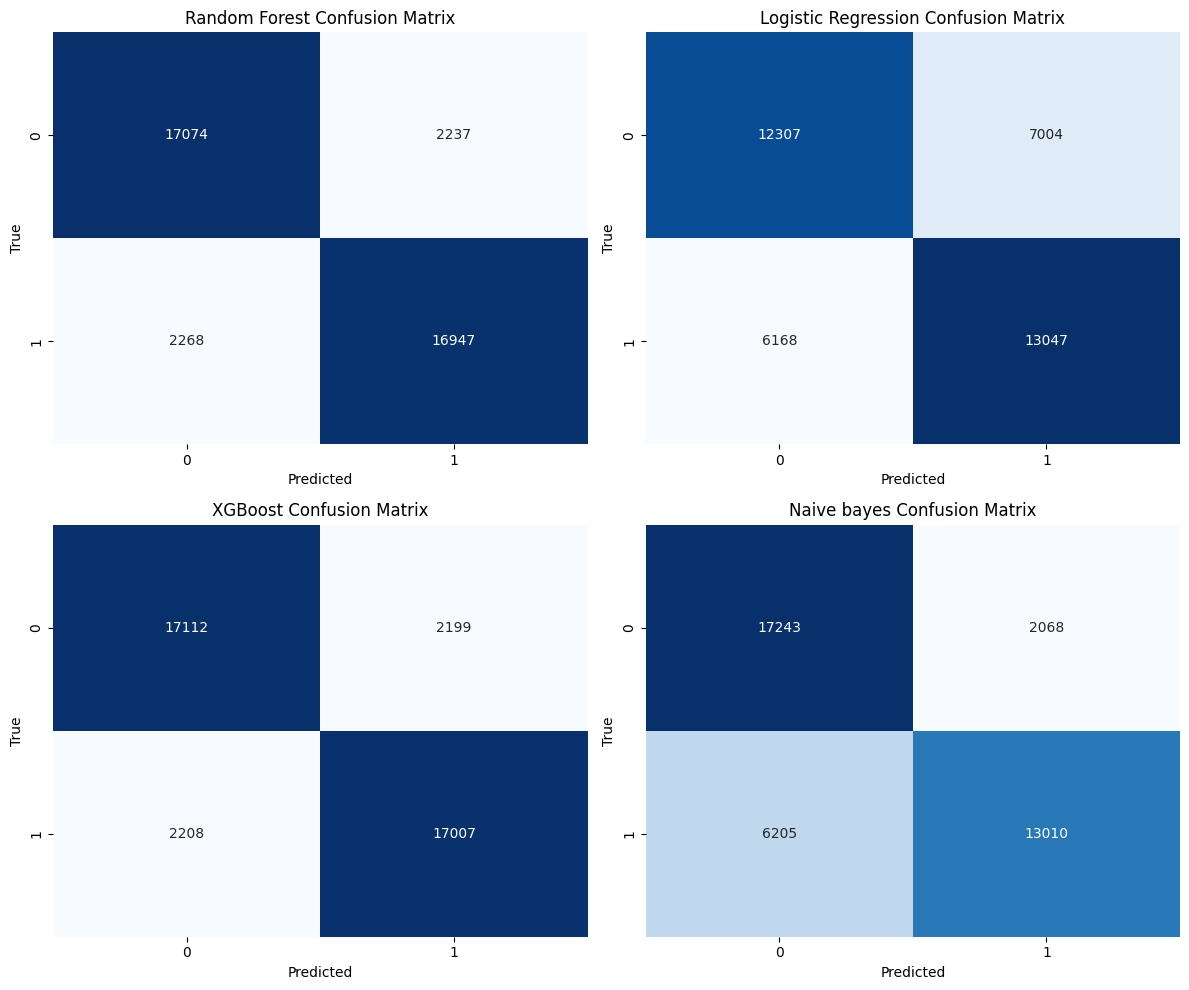

,Random Forest,Logistic Regression,XGBoost,Naive bayes,Support Vector Machine,Decision Tree
Accuracy,0.883066,0.658101,0.88561,0.785262,0.82591,0.879718
Precision,0.883067,0.658436,0.88561,0.79895,0.826244,0.879801
Recall,0.883066,0.658101,0.88561,0.785262,0.82591,0.879718
F1 Score,0.883066,0.657958,0.88561,0.782697,0.825856,0.879708


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define models
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'XGBoost': XGBClassifier(eval_metric='mlogloss', random_state=42),
    'Naive bayes': GaussianNB(),
    'Support Vector Machine': SVC(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42)
}    

# Initialize dictionary to store confusion matrices
cm_dict = {}
results = {}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Store confusion matrix
    cm_dict[model_name] = confusion_matrix(y_test, y_pred)

        # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted")
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")
    confusion = confusion_matrix(y_test, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion
    }

# Plot confusion matrix heatmaps in a 2x2 grid
fig, axes = plt.subplots(3, 2, figsize=(12, 10))

for ax, (model_name, cm) in zip(axes.flat, cm_dict.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f"{model_name} Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

plt.tight_layout()
plt.show()


# # Print results
# for model_name, metrics in results.items():
#     print(f"\nResults for {model_name}:")
#     print(f"Accuracy: {metrics['Accuracy']:.2f}")
#     print(f"Precision: {metrics['Precision']:.2f}")
#     print(f"Recall: {metrics['Recall']:.2f}")
#     print(f"F1 Score: {metrics['F1 Score']:.2f}")
#     print("Confusion Matrix:")
#     print(metrics['Confusion Matrix'])

# Convert results into a Pandas DataFrame
results_df = pd.DataFrame(results)

results_df.head(4)


In [46]:
models["XGBoost"].predict(X_test[0])

KeyError: 0

In [47]:
X_test

,collision type,driver substance abuse,injury severity,driver distracted by,vehicle first impact location,vehicle movement
184825,24,4,2,10,4,9
62024,24,4,2,6,13,18
103502,23,7,2,6,13,0
5957,6,4,4,10,13,9
98583,20,4,2,10,2,17
...,...,...,...,...,...,...
119938,24,4,2,6,4,6
89408,24,4,2,10,13,9
57661,15,4,2,10,13,0
64448,7,4,2,10,13,9


In [ ]:
for col in df_encode.columns:
	if df_encode[col].dtype in ['O', 'object', 'category']:
		df_encode[col]= encoder.fit_transform(df_encode[col])